In [1]:
import numpy as np
import pickle
import sys
sys.path.insert(0, 'base')

%load_ext autoreload
%autoreload 2

from planet_ruler import LimbObservation
from utils.fit import unpack_parameters

In [2]:
Obs = LimbObservation('demo/nh-apluto-wide-9-17-15-final_0.png',
                      fit_config='config/pluto-new-horizons.yaml')

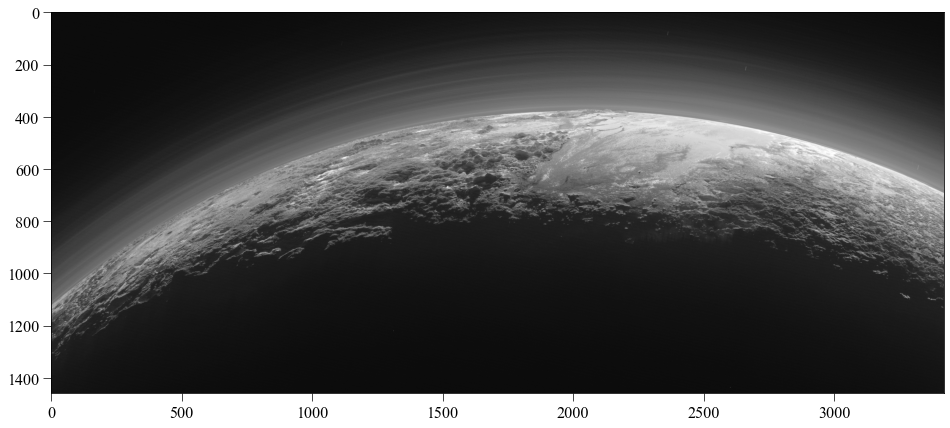

In [3]:
Obs.plot()

In [4]:
Obs.free_parameters

['r',
 'h',
 'f',
 'pxy',
 'x0',
 'y0',
 'theta_x',
 'theta_z',
 'origin_x',
 'origin_y']

In [5]:
Obs.restrict_image(ymin=0, ymax=1100)

computing gradient force map
dropping horizon string


  0%|          | 0/1000000 [00:00<?, ?it/s]

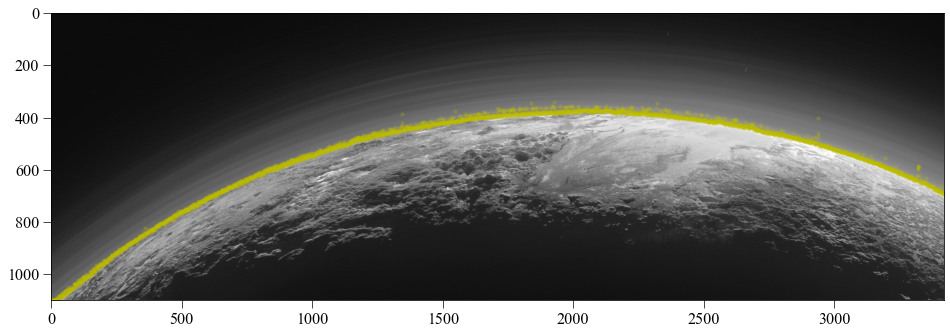

In [6]:
Obs.detect_limb(start=200, steps=1000000, g=150, m=5, t_step=0.01, max_vel=2, max_acc=1)
Obs.plot()

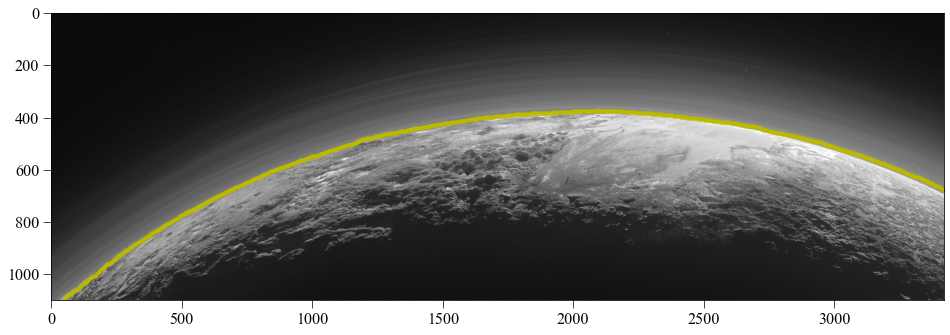

In [7]:
Obs.smooth_limb(method='rolling-median', window_length=50)
Obs.plot()

In [ ]:
Obs.fit_limb(l2=True)

In [ ]:
Obs.best_parameters

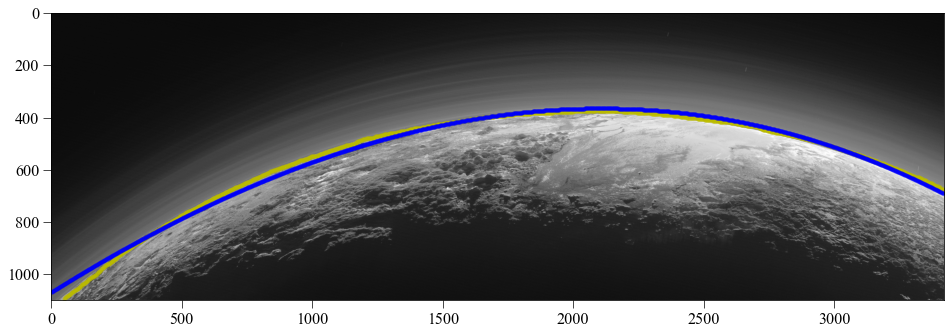

In [37]:
Obs.plot()

In [45]:
{key: (f"init {Obs.init_parameter_values[key]} vs fit " 
       f"{unpack_parameters(Obs.fit_results.x, Obs.free_parameters)[key]}")
 for key in Obs.free_parameters}

{'r': 'init 1188300 vs fit 678856.9057726242',
 'h': 'init 18000 vs fit 18056.18192665836',
 'f': 'init 0.075 vs fit 0.07500819006195368',
 'pxy': 'init 1e-05 vs fit 376.6954493140451',
 'x0': 'init 0 vs fit -0.03466820265171698',
 'y0': 'init 0 vs fit 0.04046045728927888',
 'theta_x': 'init -3.141592653589793 vs fit -0.4968908410593544',
 'theta_z': 'init 0 vs fit -1.9710001773671453',
 'origin_x': 'init 0 vs fit 982474.9687813908',
 'origin_y': 'init 207612 vs fit -48394.23835506878'}

In [55]:
with open('pluto-best.p', 'wb') as f:
    pickle.dump(Obs, f, protocol=4)